In [164]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.constants import k,e #in SI
import scipy.optimize as opt

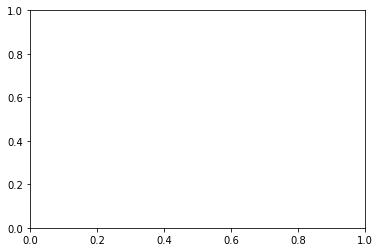

<Figure size 4320x4320 with 0 Axes>

In [165]:
(fig, graph) = plt.subplots()
plt.figure(figsize=(60, 60))
plt.style.use('seaborn-bright')

angles = [
    [359,  2/3, 28],
    [359,    0, 56],
    [358,  2/3, 12],
    [358,  1/3, 40],
    [358,  1/3, 16],
]

angles2 = [
    [179,  2/3, 22],
    [179,    0, 49],
    [178,  2/3, 16],
    [178,  1/3, 32],   
    [178,  1/3,  6]
]

baseangle = 320 + 1/3 + 12/180
baseangle2 = 140 + 1/3 + 7/180

d = [a[0] + a[1] + (a[2] / 180) - baseangle  for a in angles]
d2 = [a[0] + a[1] + (a[2] / 180) - baseangle2 for a in angles2]

deviation = [(x + y) /2 for x, y in zip(d, d2)]
wavelengths = [
    sum([450, 400])/2,
    sum([490, 450])/2,
    sum([560, 520])/2,
    sum([590, 560])/2,
    sum([700, 635])/2
]




Electromagnetic radiation is characterized by its wavelength (or frequency) and its intensity. When the wavelength is within the visible spectrum (the range of wavelengths humans can perceive, approximately from 390 nm to 700 nm), it is known as "visible light". 

| Color                                                   | Frequency interval |
| :------------------------------------------------------ | ------------------ |
| [Red](https://en.wikipedia.org/wiki/Red)                | ~ 700–635 nm       |
| [Orange](https://en.wikipedia.org/wiki/Orange_(colour)) | ~ 635–590 nm       |
| [Yellow](https://en.wikipedia.org/wiki/Yellow)          | ~ 590–560 nm       |
| [Green](https://en.wikipedia.org/wiki/Green)            | ~ 560–520 nm       |
| [Cyan](https://en.wikipedia.org/wiki/Cyan)              | ~ 520–490 nm       |
| [Blue](https://en.wikipedia.org/wiki/Blue)              | ~ 490–450 nm       |
| [Violet](https://en.wikipedia.org/wiki/Violet_(color))  | ~ 450–400 nm       |



In [166]:
def curveVal(a, const, polyDeg=1):
    # evaluates value of curve at x=a for given const of polyDeg degree polynomial
    # print([const[i]*a**(polyDeg-i) for i in range(polyDeg)])
    return sum([const[i]*a**(polyDeg-i) for i in range(polyDeg+1)])

def curvy(x, depth=1000, extend=1):
    # Returns a numpy array for with depth # of divisions within the eq
    # extend can be passed to extend the range with the ratio of the extension
    a, b = min(x), max(x)
    a, b = a + (a - extend*a), extend*b
#     print(a, b)
    return np.arange(a, b, (b-a)/depth)

def getCurve(x, y, polyDeg=1, depth=1000, extend=1):
    # returns a x, y so that they are smooth plotable polynomial curve
    const = np.polyfit(x, y, polyDeg)
    x_o = curvy(x, depth, extend)
    return x_o, [curveVal(a, const, polyDeg) for a in x_o], const

colors = ['#FFB412', '#D97E0F', '#B34692', '#72348C', '#20024D']

In [167]:
curve = np.polyfit(wavelengths, deviation, 2)
subtext = "curve = " + '%.4f'%curve[0] + "x^2 + " + '%.4f'%curve[1] + "x + " + '%.4f'%curve[2]
# print(getCurve(wavelengths, deviation, 2))


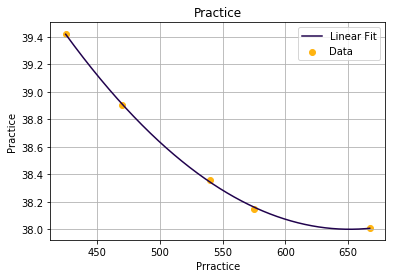

In [168]:
graph.scatter(x, y, color=colors[0], label="Data")
px, py, _ = getCurve(wavelengths, deviation, 2)
graph.plot(px, py, color=colors[4], label="Linear Fit")
graph.grid()
graph.set(title='Practice',
       ylabel='Practice',
       xlabel='Prractice'
)
graph.legend()
# graph.text(8, 2, subtext, style='italic', fontsize=8,
#         bbox={'facecolor':'white', 'alpha':0.85, 'pad':10})


fig.savefig('practice.png', dpi = 300)
fig